<a href="https://colab.research.google.com/github/mostlydipo/Tensorflow-Projects--Advanced/blob/main/Linear_Regression_Health_Cost_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [189]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-12-03 03:17:08--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.5’

insurance.csv.5     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2022-12-03 03:17:08 (4.38 MB/s) - ‘insurance.csv.5’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [190]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [191]:
dataset.isnull().any().any()

False

In [192]:
dataset.shape

(1338, 7)

In [193]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [194]:
dataset['sex'] = dataset['sex'].map({'female' : 0, 'male': 1}) # Turn category columns to numbers
dataset['smoker'] = dataset['smoker'].map({'no' : 0, 'yes': 1})

In [195]:
test_dataset = dataset.sample(frac=0.2) # Split dataset into training and testing data(20% of entire dataset)
len(test_dataset)

268

In [196]:
train_dataset= dataset[~dataset.isin(test_dataset)].dropna() # creating a dataframe of trainining data(80%) excluding testing testing data.
len(train_dataset)

1070

In [197]:
test_labels = test_dataset.pop('expenses') # Save target variable in a separate df
train_labels = train_dataset.pop('expenses')


In [198]:
train_dataset

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.9,0.0,1.0,southwest
2,28.0,1.0,33.0,3.0,0.0,southeast
3,33.0,1.0,22.7,0.0,0.0,northwest
4,32.0,1.0,28.9,0.0,0.0,northwest
5,31.0,0.0,25.7,0.0,0.0,southeast
...,...,...,...,...,...,...
1333,50.0,1.0,31.0,3.0,0.0,northwest
1334,18.0,0.0,31.9,0.0,0.0,northeast
1335,18.0,0.0,36.9,0.0,0.0,southeast
1336,21.0,0.0,25.8,0.0,0.0,southwest


In [199]:
train_dataset["region"] = pd.factorize(train_dataset["region"])[0] # Turn region column to integer columns starting from zero
test_dataset["region"] = pd.factorize(test_dataset["region"])[0]

In [200]:
normalizer = layers.experimental.preprocessing.Normalization() # Normalize data 
normalizer.adapt(np.array(train_dataset))

In [201]:
model = keras.Sequential([ # Model
    normalizer,
    layers.Dense(16, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='relu'),
])

In [202]:
model.compile( # Model compilation
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_67 (Dense)            (None, 16)                112       
                                                                 
 dense_68 (Dense)            (None, 4)                 68        
                                                                 
 dropout_15 (Dropout)        (None, 4)                 0         
                                                                 
 dense_69 (Dense)            (None, 1)                 5         
                                                                 
Total params: 198
Trainable params: 185
Non-trainable params: 13
______________________________________________________

In [203]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

**PROJECT ASSESSMENT**

9/9 - 0s - loss: 2035.0007 - mae: 2035.0007 - mse: 21568194.0000 - 135ms/epoch - 15ms/step
Testing set Mean Abs Error: 2035.00 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 8ms/step


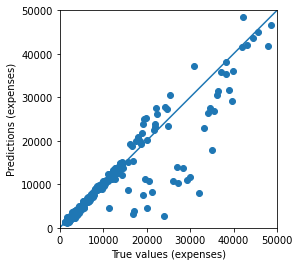

In [204]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
